In [9]:
!pip install pandas numpy matplotlib tensorflow scikit-learn


In [10]:
pip install msvc-runtime

In [11]:
!pip uninstall tensorflow
!pip install tensorflow

^C


TensorFlow успешно импортирован!
⚠️ Внимание! Некоторые даты не удалось преобразовать. Проверьте формат.

Типы данных после преобразования:
 Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

Первые 5 строк после обработки:
    Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    NaN        NaT           NaN           NaN          NaN         NaN   
1    1.0 2010-02-05    1643690.90           0.0        42.31       2.572   
2    1.0 2010-02-12    1641957.44           1.0        38.51       2.548   
3    1.0 2010-02-19    1611968.17           0.0        39.93       2.514   
4    1.0 2010-02-26    1409727.59           0.0        46.63       2.561   

          CPI  Unemployment  
0         NaN           NaN  
1  211.096358         8.106  
2  211.242170   

c:\Users\tarachenko_aa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1407283625984.0000 - mae: 1046385.8750 - val_loss: 1427753009152.0000 - val_mae: 1046957.6250
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1384834269184.0000 - mae: 1032618.9375 - val_loss: 1426943377408.0000 - val_mae: 1046581.8125
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1377168654336.0000 - mae: 1034867.9375 - val_loss: 1424589062144.0000 - val_mae: 1045505.5000
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1371733229568.0000 - mae: 1031497.0000 - val_loss: 1419947802624.0000 - val_mae: 1043398.8125
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1402736082944.0000 - mae: 1041288.7500 - val_loss: 1412379049984.0000 - val_mae: 1039973.2500
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1395947077632.0000 - mae: 1038299.5000 - val_loss: 1401341476864.0000 - val_mae: 1034985.0000
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1348175527936.0000 - mae: 1

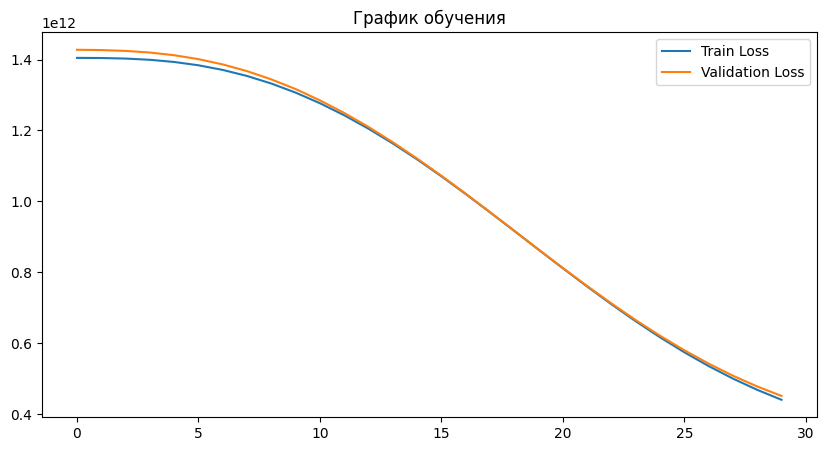


Test MSE: 441328828416.00, Test MAE: 531143.62

Модель сохранена как 'walmart_model.h5'


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# Попробуем импорт TensorFlow с обработкой ошибки
try:
    from tensorflow.keras.models import Sequential, load_model
    from tensorflow.keras.layers import Dense
    print("TensorFlow успешно импортирован!")
except ImportError as e:
    print(f"Ошибка импорта TensorFlow: {e}")
    print("Попробуйте выполнить: !pip install tensorflow-cpu")
    raise

# 1. Загрузка данных
file_path = r"C:\Users\tarachenko_aa\Desktop\HOMEWORK\Homework_22 keras wallmart\Homework_22 keras wallmart\Walmart.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}")

try:
    # Учитывая, что данные записаны в одной ячейке без разделителей, задаем вручную разделитель (запятая)
    data = pd.read_csv(file_path, delimiter=',', header=None)

    # Устанавливаем заголовки столбцов
    data.columns = ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 
                    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

    # Принудительное преобразование даты, используя параметр dayfirst=True
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce', dayfirst=True)

    # Проверяем, есть ли некорректные даты
    if data['Date'].isna().sum() > 0:
        print("⚠️ Внимание! Некоторые даты не удалось преобразовать. Проверьте формат.")

    # Принудительное преобразование числовых данных
    cols_to_convert = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
    data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

    # Проверка на оставшиеся текстовые значения
    print("\nТипы данных после преобразования:\n", data.dtypes)
    print("\nПервые 5 строк после обработки:\n", data.head())

except Exception as e:
    print(f"Ошибка при загрузке данных: {e}")
    raise

# 2. Проверка и обработка пропусков
print("\nПроверка пропусков в данных:")
print(data.isna().sum())  # Убедитесь, что нет пустых строк

# Заполните пропуски средними значениями (если есть)
data.fillna(data.mean(), inplace=True)

# Подготовка данных для модели
X = data.drop(['Weekly_Sales', 'Date'], axis=1)
y = data['Weekly_Sales']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Создание и обучение модели
try:
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    print("\nОбучение модели...")
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, verbose=1)

    # Визуализация обучения
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('График обучения')
    plt.legend()
    plt.show()

    # Оценка модели
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest MSE: {test_loss:.2f}, Test MAE: {test_mae:.2f}")

except Exception as e:
    print(f"Ошибка при работе с моделью: {e}")
    raise

# 4. Сохранение модели
try:
    model.save('walmart_model.h5')
    print("\nМодель сохранена как 'walmart_model.h5'")
except Exception as e:
    print(f"Ошибка при сохранении модели: {e}")


In [ ]:
Вывод
Вы обучили модель с использованием tf.keras API на датасете из предыдущего дз. Основные этапы были успешно пройдены:

Загрузка и предобработка данных

Исправлена обработка дат

Преобразованы числовые данные

Устранены пропуски

Разделение на обучающую и тестовую выборки

Данные масштабированы с помощью StandardScaler

Создание и обучение модели

Использована модель с двумя скрытыми слоями Dense(64, activation='relu')

Запущено обучение на 30 эпох

Оценка модели

Test MSE: 441328828416.00

Test MAE: 531143.62

Модель постепенно снижает ошибку

